#### New to Plotly?
Plotly's Python library is free and open source! [Get started](https://plot.ly/python/getting-started/) by downloading the client and [reading the primer](https://plot.ly/python/getting-started/).
<br>You can set up Plotly to work in [online](https://plot.ly/python/getting-started/#initialization-for-online-plotting) or [offline](https://plot.ly/python/getting-started/#initialization-for-offline-plotting) mode, or in [jupyter notebooks](https://plot.ly/python/getting-started/#start-plotting-online).
<br>We also have a quick-reference [cheatsheet](https://images.plot.ly/plotly-documentation/images/python_cheat_sheet.pdf) (new!) to help you get started!

#### Version Check
Plotly's python package is updated frequently. Run `pip install plotly --upgrade` to use the latest version.

In [2]:
import plotly
plotly.__version__

'3.8.1'

In [3]:
from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go

import pandas as pd
import numpy as np
import ipywidgets as widgets

We'll configure the notebook for use in [offline](https://plot.ly/python/getting-started/#initialization-for-offline-plotting) mode

In [4]:
init_notebook_mode(connected=True)

#### Parallel Categories Diagram
The parallel categories diagram is a visualization of multi-dimensional categorical data sets.  Each variable in the data set is represented by a column of rectangles, where each rectangle corresponds to a discrete value taken on by that variable.  The relative heights of the rectangles reflect the relative frequency of occurrence of the corresponding value.

Combinations of category rectangles across dimensions are connected by ribbons, where the height of the ribbon corresponds to the relative frequency of occurrence of the combination of categories in the data set.

#### Basic Parallel Categories Diagram
In this first example, we visualize the hair color, eye color, and sex of a sample of 8 people.  Hovering over a category rectangle displays a tooltip with the number of people with that single trait. Hovering over a ribbon in the diagram displays a tooltip with the number of people with a particular combination of the three traits connected by the ribbon.

The dimension labels can be dragged horizontally to reorder the dimensions and the category rectangles can be dragged vertically to reorder the categories within a dimension.

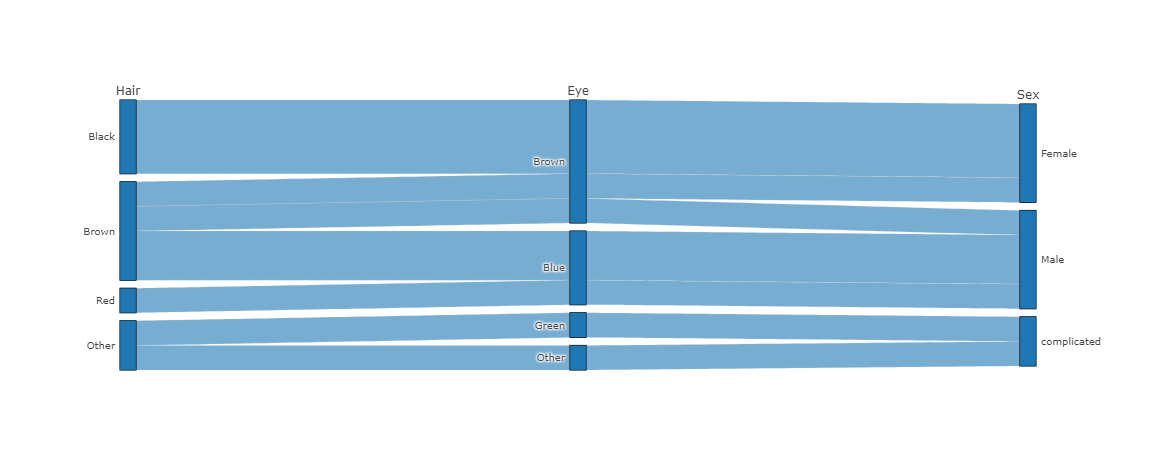

In [5]:
parcats = go.Parcats(
    dimensions=[
        {'label': 'Hair',
         'values': ['Black', 'Black', 'Black', 'Brown',
                    'Brown', 'Brown', 'Red', 'Brown', 'Other', 'Other']},
        {'label': 'Eye',
         'values': ['Brown', 'Brown', 'Brown', 'Brown',
                    'Brown', 'Blue', 'Blue', 'Blue', 'Green', 'Other']},
        {'label': 'Sex',
         'values': ['Female', 'Female', 'Female', 'Male',
                    'Female', 'Male', 'Male', 'Male', 'complicated', 'complicated']}]
)

iplot([parcats])

#### Basic Parallel Categories Diagram with Counts
If the frequency of occurrence for each combination of attributes is known in advance, this can be specified using the `counts` property

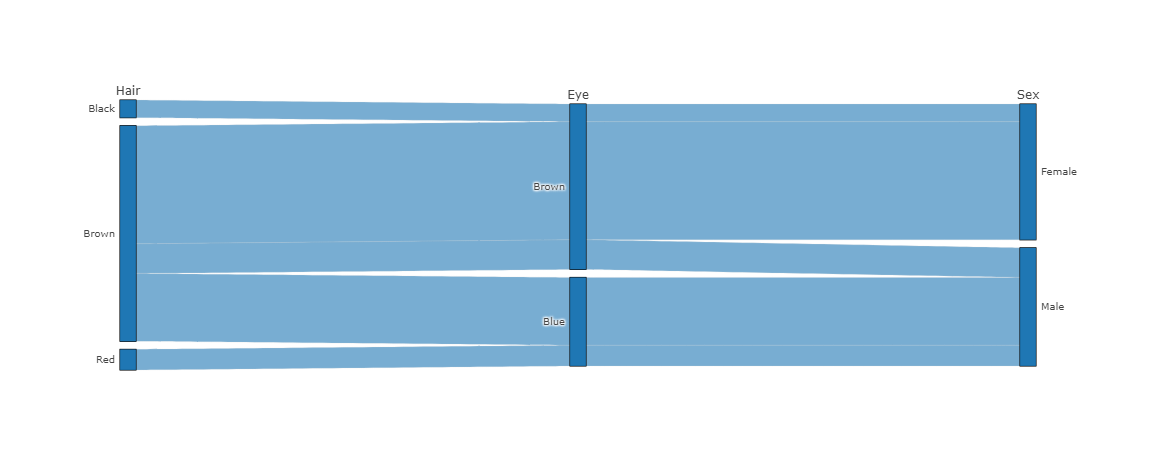

In [6]:
parcats = go.Parcats(
    dimensions=[
        {'label': 'Hair',
         'values': ['Black', 'Brown', 'Brown', 'Brown', 'Red']},
        {'label': 'Eye',
         'values': ['Brown', 'Brown', 'Brown', 'Blue', 'Blue']},
        {'label': 'Sex',
         'values': ['Female', 'Male', 'Female', 'Male', 'Male']}],
    counts=[6, 10, 40, 23, 7]
)

iplot([parcats])

#### Mutli-Color Parallel Categories Diagram
The color of the ribbons can be specified with the `line.color` property.  Similar to other trace types, this property may be set to an array of numbers, which are then mapped to colors according to the the colorscale specified in the `line.colorscale` property.

Here is an example of visualizing the survival rate of passengers in the titanic dataset, where the ribbons are colored based on survival outcome.

By setting the `hoveron` property to `'color'` and the `hoverinfo` property to `'count+probability'` the tooltips now display count and probability information for each color (survival outcome) per category.

By setting the `arrangement` property to `'freeform'` it is now possible to drag categories horizontally to reorder dimensions as well as vertically to reorder categories within the dimension.

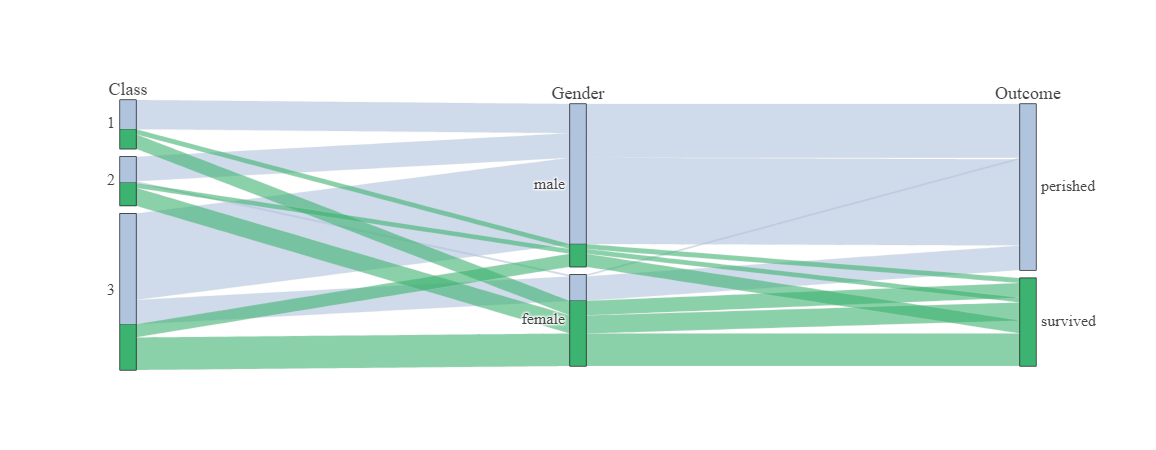

In [7]:
titanic_df = pd.read_csv(
    "https://raw.githubusercontent.com/plotly/datasets/master/titanic.csv")

# Create dimensions
class_dim = go.parcats.Dimension(
    values=titanic_df.Pclass,
    categoryorder='category ascending',
    label="Class"
)

gender_dim = go.parcats.Dimension(
    values=titanic_df.Sex,
    label="Gender"
)

survival_dim = go.parcats.Dimension(
  values=titanic_df.Survived,
  label="Outcome",
  categoryarray=[0, 1],
  ticktext=['perished', 'survived'],
)

# Create parcats trace
color = titanic_df.Survived;
colorscale = [[0, 'lightsteelblue'], [1, 'mediumseagreen']];

data = [
    go.Parcats(
        dimensions=[class_dim, gender_dim, survival_dim],
        line={'color': color,
              'colorscale': colorscale},
        hoveron='color',
        hoverinfo='count+probability',
        labelfont={'size': 18, 'family': 'Times'},
        tickfont={'size': 16, 'family': 'Times'},
        arrangement='freeform'
    )
]

# Display figure
iplot(data)

#### Parallel Categories Linked Brushing
This example demonstrates how the `on_selection` and `on_click` callbacks can be used to implement linked brushing between 3 categorical dimensions displayed with a `parcats` trace and 2 continuous dimensions displayed with a `scatter` trace.

This example also sets the `line.shape` property to `hspline` to cause the ribbons to curve between categories.

**Note:** In order for the callback functions to be executed the figure must be a `FigureWidget`, and the figure should display itself. In particular the `plot` and `iplot` functions should not be used.

In [8]:
cars_df = pd.read_csv(
    'https://raw.githubusercontent.com/plotly/datasets/master/imports-85.csv')

# Build parcats dimensions
categorical_dimensions = [
  'body-style',
  'drive-wheels',
  'fuel-type'
];

dimensions = [
    dict(values=cars_df[label], label=label)
    for label in categorical_dimensions
]

# Build colorscale
color = np.zeros(len(cars_df), dtype='uint8')
colorscale = [[0, 'gray'], [1, 'firebrick']]

# Build figure as FigureWidget
fig = go.FigureWidget(
    data=[
        go.Scatter(
            x=cars_df.horsepower,
            y=cars_df['highway-mpg'],
            marker={'color': 'gray'},
            mode='markers',
            selected={'marker': {'color': 'firebrick'}},
            unselected={'marker': {'opacity': 0.3}}),

        go.Parcats(
            domain={'y': [0, 0.4]},
            dimensions=dimensions,
            line={
                'colorscale': colorscale,
                'cmin': 0,
                'cmax': 1,
                'color': color,
                'shape': 'hspline'})
    ],
    layout=go.Layout(
        height=800,
        xaxis={'title': 'Horsepower'},
        yaxis={'title': 'MPG',
               'domain': [0.6, 1]},
        dragmode='lasso',
        hovermode='closest')
)

# Update color callback
def update_color(trace, points, state):
    # Update scatter selection
    fig.data[0].selectedpoints = points.point_inds
    
    # Update parcats colors
    new_color = np.zeros(len(cars_df), dtype='uint8')
    new_color[points.point_inds] = 1
    fig.data[1].line.color = new_color
    
# Register callback on scatter selection...
fig.data[0].on_selection(update_color)
# and parcats click
fig.data[1].on_click(update_color)

# Display figure
fig

FigureWidget({
    'data': [{'marker': {'color': 'gray'},
              'mode': 'markers',
              'sele…

#### Parallel Categories with Multi-Color Linked Brushing
This example extends the previous example to support brushing with multiple colors.  The toggle buttons above may be used to select the active color, and this color will be applied when points are selected in the `scatter` trace and when categories or ribbons are clicked in the `parcats` trace.

In [27]:
cars_df = pd.read_csv(
    'https://raw.githubusercontent.com/plotly/datasets/master/imports-85.csv')

# Build parcats dimensions
categorical_dimensions = [
  'body-style',
  'drive-wheels',
  'fuel-type'
];

dimensions = [
    dict(values=cars_df[label], label=label)
    for label in categorical_dimensions
]

# Build colorscale
color = np.zeros(len(cars_df), dtype='uint8')
colorscale = [[0, 'gray'], [0.33, 'gray'],
              [0.33, 'firebrick'], [0.66, 'firebrick'],
              [0.66, 'blue'], [1.0, 'blue']];
cmin = -0.5
cmax = 2.5

# Build figure as FigureWidget
fig = go.FigureWidget(
    data=[
        go.Scatter(
            x=cars_df.horsepower,
            y=cars_df['highway-mpg'],
            marker={'color': color,
                    'cmin': cmin,
                    'cmax': cmax,
                    'colorscale': colorscale,
                    'showscale': True,
                    'colorbar': {'tickvals': [0, 1, 2],
                                 'ticktext': ['None', 'Red', 'Blue']}
                   },
            mode='markers'),

        go.Parcats(
            domain={'y': [0, 0.4]},
            dimensions=dimensions,
            line={
                'colorscale': colorscale,
                'cmin': cmin,
                'cmax': cmax,
                'color': color,
                'shape': 'hspline'})
    ],
    layout=go.Layout(
        height=800,
        xaxis={'title': 'Horsepower'},
        yaxis={'title': 'MPG',
               'domain': [0.6, 1]},
        dragmode='lasso',
        hovermode='closest')
)

# Build color selection widget
color_toggle = widgets.ToggleButtons(
    options=['None', 'Red', 'Blue'],
    index=1,
    description='Brush Color:',
    disabled=False,
)

# Update color callback
def update_color(trace, points, state):
    # Compute new color array
    new_color = np.array(fig.data[0].marker.color)
    new_color[points.point_inds] = color_toggle.index
    
    with fig.batch_update(): 
        # Update scatter color
        fig.data[0].marker.color = new_color

        # Update parcats colors
        fig.data[1].line.color = new_color
    
# Register callback on scatter selection...
fig.data[0].on_selection(update_color)
# and parcats click
fig.data[1].on_click(update_color)

# Display figure
widgets.VBox([color_toggle, fig])

#### Reference
See https://plot.ly/python/reference/#parcats for more information and chart attribute options!